In [22]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [24]:
org_data = pd.read_excel('car_mpg.xlsx')
org_data
# data.set_index( data.iloc[:,[0]] , inplace=False) 

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [25]:
# 1. 프레임 정보확인
print(org_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB
None


In [26]:
# 2. row , col 의 shape 확인
def frameInfo(df) :
    print('shape : {}'.format(df.shape))
    print('size  : {}'.format(df.size))
    print('ndim  : {}'.format(df.ndim))
    print('index : {}'.format(df.index))
    print('index type : {}'.format( type(df.index) ))
    print('columns : {}'.format(df.columns))
    print('columns type : {}'.format( type( df.columns) ))
    
    
frameInfo(org_data)

shape : (234, 12)
size  : 2808
ndim  : 2
index : RangeIndex(start=0, stop=234, step=1)
index type : <class 'pandas.core.indexes.range.RangeIndex'>
columns : Index(['Unnamed: 0', 'manufacturer', 'model', 'displ', 'year', 'cyl', 'trans',
       'drv', 'cty', 'hwy', 'fl', 'class'],
      dtype='object')
columns type : <class 'pandas.core.indexes.base.Index'>


In [27]:
# 3. 기술통계값 확인
print(org_data.describe())

       Unnamed: 0       displ         year         cyl         cty         hwy
count  234.000000  234.000000   234.000000  234.000000  234.000000  234.000000
mean   117.500000    3.471795  2003.500000    5.888889   16.858974   23.440171
std     67.694165    1.291959     4.509646    1.611534    4.255946    5.954643
min      1.000000    1.600000  1999.000000    4.000000    9.000000   12.000000
25%     59.250000    2.400000  1999.000000    4.000000   14.000000   18.000000
50%    117.500000    3.300000  2003.500000    6.000000   17.000000   24.000000
75%    175.750000    4.600000  2008.000000    8.000000   19.000000   27.000000
max    234.000000    7.000000  2008.000000    8.000000   35.000000   44.000000


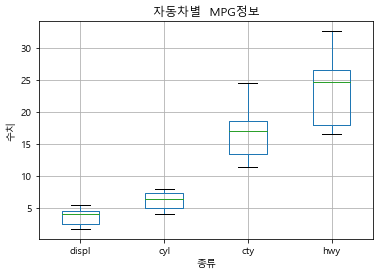

In [28]:
# 4. 양적자료(수치 형태)의 데이터 분포 확인(boxplot)
data  = org_data.groupby(['manufacturer']).mean().loc[:,['displ', 'cyl', 'cty', 'hwy']]
plt.figure()
plt.title('자동차별  MPG정보')
plt.xlabel('종류')
plt.ylabel('수치')
data.boxplot()
plt.show()
plt.close()

In [29]:
# 5. 질적자료(범주 형태)에 대한 데이터 빈도 확인) 
data  = org_data.loc[:,['manufacturer', 'model', 'year', 'trans','drv','fl','class']]

#법주 조회
print(data['trans'].value_counts())
print(data['drv'].value_counts())
print(data['fl'].value_counts())
print(data['class'].value_counts())


auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64
f    106
4    103
r     25
Name: drv, dtype: int64
r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64


In [30]:
# 문제01]
# 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
# 배기량이 4 이하인 자동차화 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 
# 높은지 알아보자

# 4 이하 5이상   
org_data['구분']  = np.where( org_data.displ <=4,'4이하',  np.where(  org_data.displ>= 5,'5이상', None )) 

# 결측치 제거  
data =org_data[org_data['구분'].notnull() ]
data =  data.groupby(['구분']).mean().sort_values(by='hwy',  ascending=False)
print(data['hwy'])
print('>>> {} 자동차의  고속도로 평균연비가 높다 '.format(data.index[0]))

구분
4이하    25.963190
5이상    18.078947
Name: hwy, dtype: float64
>>> 4이하 자동차의  고속도로 평균연비가 높다 


In [31]:
# 문제 02]
# 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
# audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 c 
# ty(도시연비)가 평균적으로 더 높은지 알아보시오.

# df2[df2['E'].isin(['two', 'four'])]

data = org_data[org_data['manufacturer'].isin(['audi','toyota'])]
data =  data.groupby(['manufacturer']).mean().sort_values(by='cty',  ascending=False) 
print(data['cty'])
print('>>> {} 자동차의 도시 평균 연비가 높다 '.format(data.index[0]))

manufacturer
toyota    18.529412
audi      17.611111
Name: cty, dtype: float64
>>> toyota 자동차의 도시 평균 연비가 높다 


>>> 전체평균은 22.50943 이다 


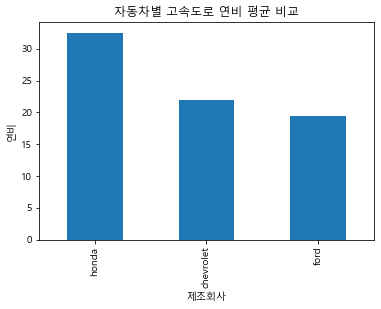

In [32]:
# 문제 03]
# chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
# 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.
# bar plot 이용한 시각화

data = org_data[org_data['manufacturer'].isin(['chevrolet','ford','honda'])] 
print('>>> 전체평균은 %.5f 이다 '%( data[['hwy']].mean()))
data =  data.groupby(['manufacturer']).mean().sort_values(by='hwy',  ascending=False) 

data['hwy'].plot.bar(title='자동차별 고속도로 연비 평균 비교', xlabel = '제조회사', ylabel = '연비') 
plt.show()

In [33]:
# 데이터 전처리 : 연료가격 변수 추가(price_fl)
# c : 가스 2.35, d : 디젤 2.38, e : 에탄올 2.11 , p : 고급휘발유 2.76  , r : 보통휘발유 2.22

# 문제 04]
# 우리가 만든 연료 가격 프레임을 웝본 프레임에 병합

fuel=pd.DataFrame({'fl':['c','d','e','p','r'] , 
                  'fule':['가스','디젤','에탄올','고급휘발유','보통휘발유']  , 
                  'price_fl':[2.35,2.38, 2.11 ,2.76 ,2.22 ] })

data =pd.merge(org_data,fuel,on='fl',how ='outer')
data

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,구분,fule,price_fl
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,4이하,고급휘발유,2.76
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,4이하,고급휘발유,2.76
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,4이하,고급휘발유,2.76
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,4이하,고급휘발유,2.76
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,4이하,고급휘발유,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,123,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv,4이하,디젤,2.38
230,213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,4이하,디젤,2.38
231,222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,4이하,디젤,2.38
232,223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,4이하,디젤,2.38


In [34]:
# 문제 05]
# 머지한 데이터 프레임에서 model, fl, price_fl 만 추출(필터링)
f_data = data[[ 'model', 'fl', 'price_fl']] 
# 데이터 전처리 과정에서 결측값 확인하기
print(f_data.isnull().sum())
f_data

model       0
fl          0
price_fl    0
dtype: int64


,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76
...,...,...,...
229,grand cherokee 4wd,d,2.38
230,jetta,d,2.38
231,new beetle,d,2.38
232,new beetle,d,2.38


In [35]:
# 문제 06]
# 구동방식(drv) 별 고속도로 연비(hwy)평균
# 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자
data['hwy'][10:12] = None
# 데이터 전처리 과정에서 결측값 확인하기
print(data.isnull().sum())


Unnamed: 0       0
manufacturer     0
model            0
displ            0
year             0
cyl              0
trans            0
drv              0
cty              0
hwy              2
fl               0
class            0
구분              33
fule             0
price_fl         0
dtype: int64


<ipython-input-35-0cd0cc0d9c44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hwy'][10:12] = None
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


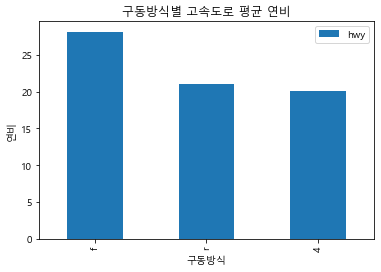

In [36]:
# 문제 07]
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
# bar plot 시각화

data.dropna(inplace=True)
d_data =  data.groupby(['drv']).mean().sort_values(by='hwy',  ascending=False)[['hwy']]
d_data.plot.bar(title='구동방식별 고속도로 평균 연비',xlabel = '구동방식', ylabel = '연비') 
plt.show()

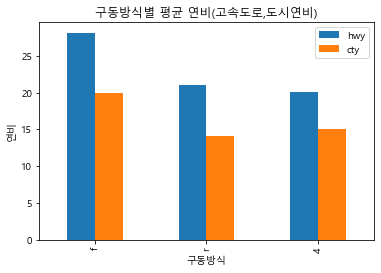

In [37]:
# 문제 08]
# 위에서 했던 방식과 동일하게 구동방식별 고속도로, 도시연비의 평균을 구해보고
# 이를 데이터 프레임으로 만들어서 막대바로 시각화 해 보자
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
# 시각화

data.dropna(inplace=True)
d2_data =  data.groupby(['drv']).mean().sort_values(by='hwy',  ascending=False)[['hwy','cty']]
d2_data.plot.bar(title='구동방식별 평균 연비(고속도로,도시연비)',xlabel = '구동방식', ylabel = '연비') 
plt.show()


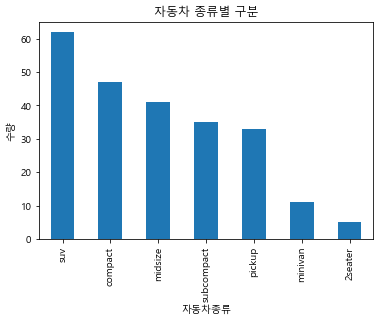

In [38]:
# 문제 09]
# 자동차(class)중에서 어떤 자동차가 가장 많으지 알아보려고 한다.
# 종류별 빈도를 막대바로 시각화 해 보자

# 값의 종류별 빈도수 검사
data = org_data['class'].value_counts().sort_values( ascending =False)
data.plot.bar(title='자동차 종류별 구분',xlabel = '자동차종류', ylabel = '수량');plt.show()

In [1]:
# 문제 10]
# 어떤 회사에서 생산한 suv 차종의 도시 연비가 높은지를 알아보려고 한다
# suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 바로 시각화 해 보자
# bar plot 시각화
data = org_data[org_data['class']=='suv'].groupby(['manufacturer']).mean().sort_values(by='cty',  ascending=False)['cty'][0:5]
data.plot.bar(title='차종별 평균 도시연비',xlabel = '제조사', ylabel = '도시연비');plt.show()

NameError: name 'org_data' is not defined